# Example 1: Normal distributed noise

In [10]:
from pyDOE import *
import matplotlib.pyplot as plt
from scipy import stats
import numpy.random as R
import global_as

In [11]:
Q = np.identity(10)
dim = 10
Q[:dim,:dim] = stats.ortho_group.rvs(dim=dim)
a = 10**(np.array([2,-1,-1.5,-2,-2.5,-3,-3.5,-4,-4.5,-5]))

## AS results
First, we apply active subspace method for different cases.

In [12]:
epsilon = 0.00001
def dFunc(x):
    chi = x.shape[0]
    xe = np.tile(x.transpose(), dim).transpose()+np.repeat(np.array(np.identity(dim)*epsilon), chi, axis=0)
    return ((Func(xe)-np.tile(Func(x),dim))/epsilon).reshape(dim,chi)

def Func(x1): 
    x = (x1@Q)**2*np.sqrt(a) 
    return np.sum(x,axis=1)

chi = 10000
epsilon = 10**-9
z = R.uniform(0, 1, (chi, dim))
deriv = dFunc(z)
deriv /= np.sqrt(chi)
uo, so, vho = np.linalg.svd(deriv.astype(float), full_matrices=True)  
so = so**2

def Func(x1): 
    x = (x1@Q)**2*np.sqrt(a) 
    return np.sum(x,axis=1) + R.normal(0,(1),x1.shape[0])

z = R.uniform(0, 1, (chi, dim))
u0list = []
s0list = []
for epsilon in [0.1,0.001,10**-5]:
    deriv = dFunc(z)
    deriv /= np.sqrt(chi)
    u0, s0, vh0 = np.linalg.svd(deriv.astype(float), full_matrices=True) 
    s0 = s0**2
    u0list.append(u0)
    s0list.append(s0)

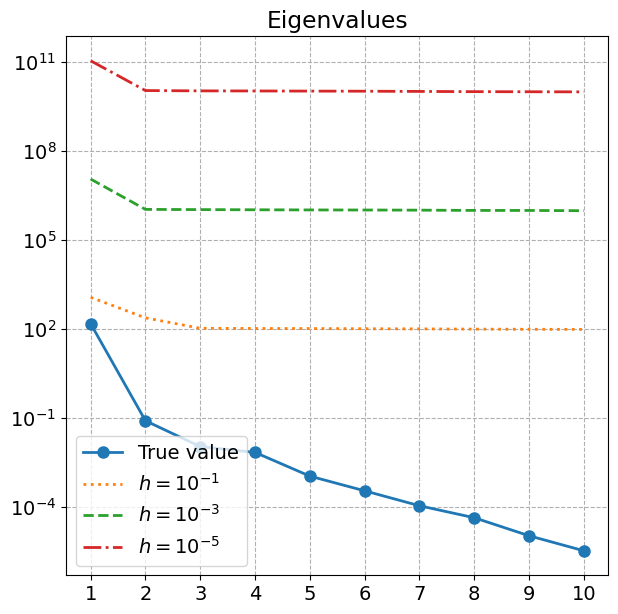

In [4]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(7,7))
plt.rc('font')
k = s0.shape[0]
plt.semilogy(range(1 ,k+1), so, 'o-',markersize=8,linewidth=2,label = 'True value')
plt.semilogy(range(1 ,k+1), s0list[0], ':',markersize=12,linewidth=2,label = '$h=10^{-1}$')
plt.semilogy(range(1 ,k+1), s0list[1], '--',markersize=12,linewidth=2,label = '$h=10^{-3}$')
plt.semilogy(range(1 ,k+1), s0list[2], '-.',markersize=12,linewidth=2,label = '$h=10^{-5}$')

plt.title('Eigenvalues')
plt.grid(True,linestyle = '--')
plt.xticks(range(1, k+1))

plt.legend()
plt.show()

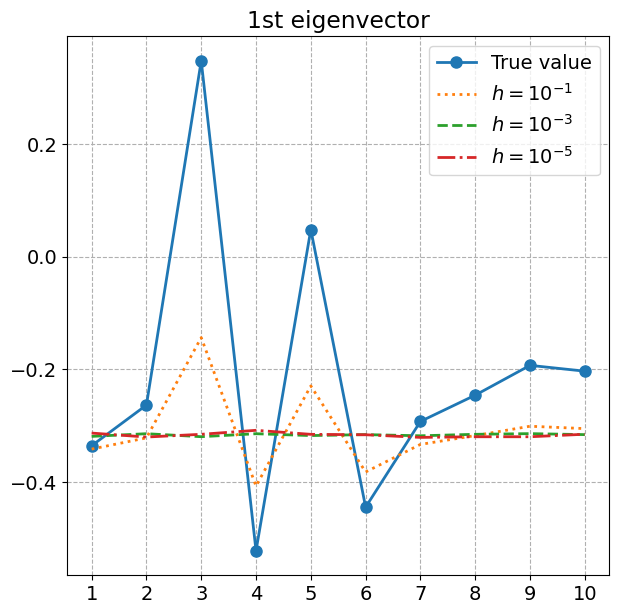

In [14]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(7,7))
plt.rc('font')
k = s0.shape[0]
plt.plot(range(1 ,k+1), uo[:,0], 'o-',markersize=8,linewidth=2,label = 'True value')
plt.plot(range(1 ,k+1), u0list[0][:,0], ':',markersize=12,linewidth=2,label = '$h=10^{-1}$')
plt.plot(range(1 ,k+1), u0list[1][:,0], '--',markersize=12,linewidth=2,label = '$h=10^{-3}$')
plt.plot(range(1 ,k+1), u0list[2][:,0], '-.',markersize=12,linewidth=2,label = '$h=10^{-5}$')

plt.title('1st eigenvector')
plt.grid(True,linestyle = '--')
plt.xticks(range(1, k+1))

plt.legend()
plt.show()

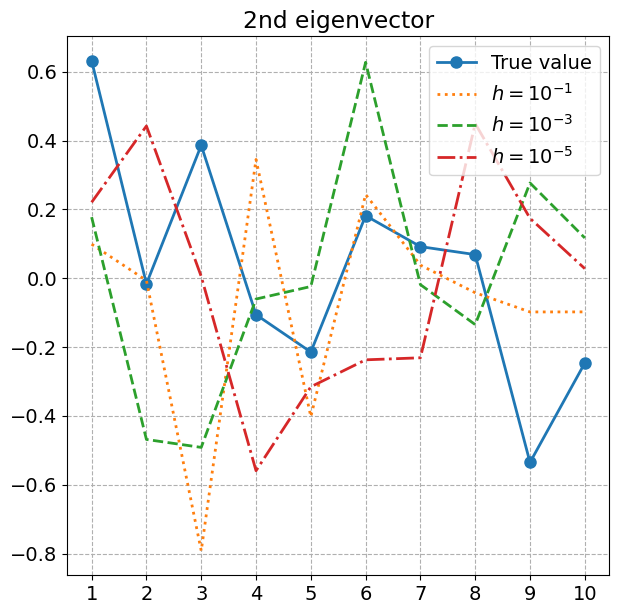

In [15]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(7,7))
plt.rc('font')
k = s0.shape[0]
plt.plot(range(1 ,k+1), uo[:,1], 'o-',markersize=8,linewidth=2,label = 'True value')
plt.plot(range(1 ,k+1), u0list[0][:,1], ':',markersize=12,linewidth=2,label = '$h=10^{-1}$')
plt.plot(range(1 ,k+1), u0list[1][:,1], '--',markersize=12,linewidth=2,label = '$h=10^{-3}$')
plt.plot(range(1 ,k+1), u0list[2][:,1], '-.',markersize=12,linewidth=2,label = '$h=10^{-5}$')

plt.title('2nd eigenvector')
plt.grid(True,linestyle = '--')
plt.xticks(range(1, k+1))

plt.legend()
plt.show()

## GAS results

In [13]:
def Func(x1): 
    x = (x1@Q)**2*np.sqrt(a)
    return np.sum(x,axis=1)
uo, so = global_as.GAS(Func,dim,chi,100,100,shiftedSobol=True) 

def Func(x1): 
    x = (x1@Q)**2*np.sqrt(a) 
    return np.sum(x,axis=1) + R.normal(0,0.01,x1.shape[0])
ulist = []
slist = []
for M2 in [1,10,100]:
    M1 = int(chi/M2)
    u0, s0 = global_as.GAS(Func,dim,chi,M1,M2,shiftedSobol=True)
    ulist.append(u0)
    slist.append(s0)

/Users/yrl192/Library/Python/3.9/lib/python/site-packages/scipy/stats/_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


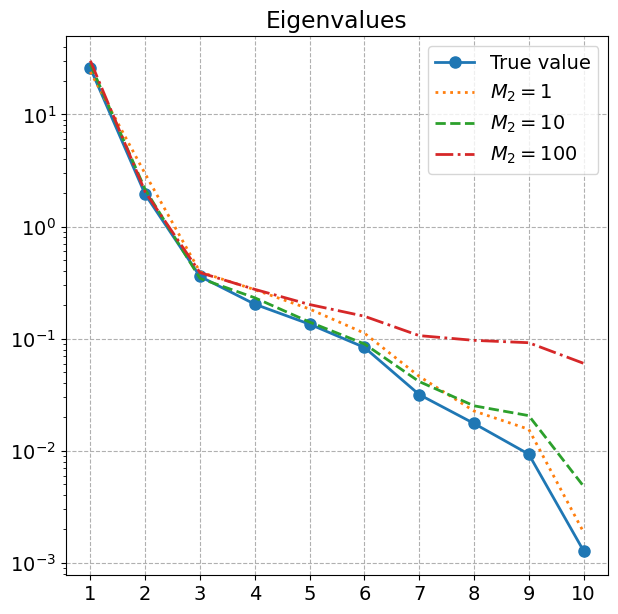

In [14]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(7,7))
plt.rc('font')
k = s0.shape[0]
plt.semilogy(range(1 ,k+1), so, 'o-',markersize=8,linewidth=2,label = 'True value')
plt.semilogy(range(1 ,k+1), slist[0], ':',markersize=12,linewidth=2,label = '$M_2=1$')
plt.semilogy(range(1 ,k+1), slist[1], '--',markersize=12,linewidth=2,label = '$M_2=10$')
plt.semilogy(range(1 ,k+1), slist[2], '-.',markersize=12,linewidth=2,label = '$M_2=100$')

plt.title('Eigenvalues')
plt.grid(True,linestyle = '--')
plt.xticks(range(1, k+1))

plt.legend()
plt.show()

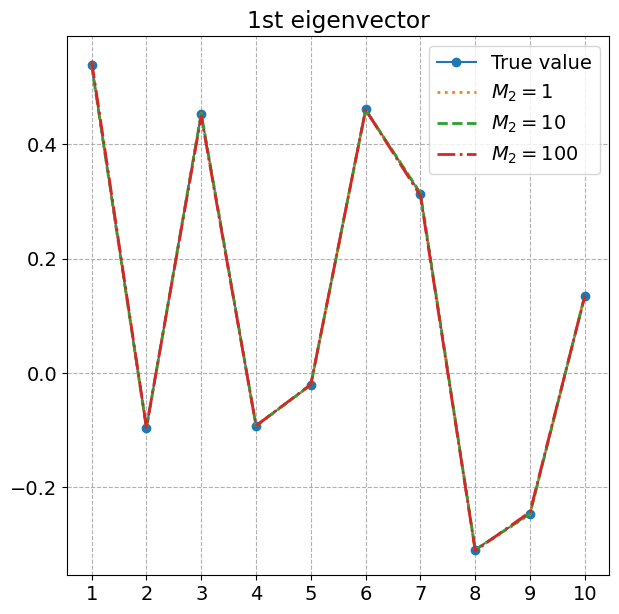

In [7]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(7,7))
plt.rc('font')
k = s0.shape[0]
plt.plot(range(1 ,k+1), uo[:,0], 'o-',label = 'True value')
plt.plot(range(1 ,k+1), -ulist[0][:,0], ':',markersize=12,linewidth=2,label = '$M_2=1$')
plt.plot(range(1 ,k+1), -ulist[1][:,0], '--',markersize=12,linewidth=2,label = '$M_2=10$')
plt.plot(range(1 ,k+1), -ulist[2][:,0], '-.',markersize=12,linewidth=2,label = '$M_2=100$')

plt.title('1st eigenvector')
plt.grid(True,linestyle = '--')
plt.xticks(range(1, k+1))

plt.legend()
plt.show()

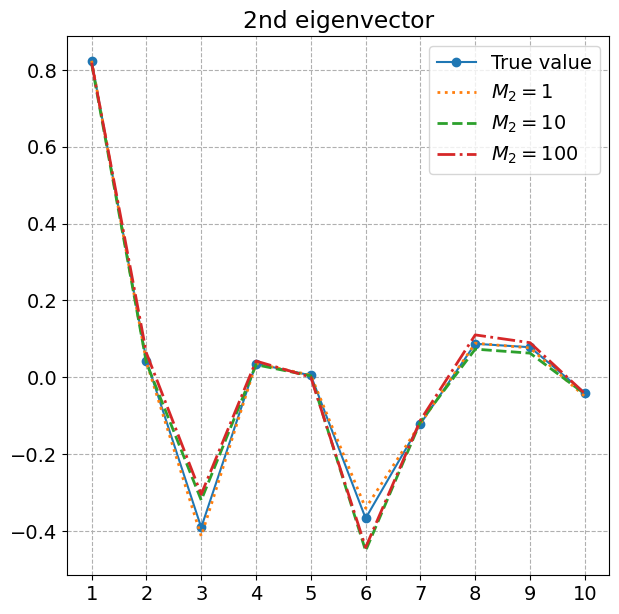

In [9]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(7,7))
plt.rc('font')
k = s0.shape[0]
plt.plot(range(1 ,k+1), uo[:,1], 'o-',label = 'True value')
plt.plot(range(1 ,k+1), -ulist[0][:,1], ':',markersize=12,linewidth=2,label = '$M_2=1$')
plt.plot(range(1 ,k+1), -ulist[1][:,1], '--',markersize=12,linewidth=2,label = '$M_2=10$')
plt.plot(range(1 ,k+1), -ulist[2][:,1], '-.',markersize=12,linewidth=2,label = '$M_2=100$')

plt.title('2nd eigenvector')
plt.grid(True,linestyle = '--')
plt.xticks(range(1, k+1))

plt.legend()
plt.show()